# **Herzlich willkommen im Kurs Data Science für Klimadaten!** ⭐


Heute werden wir gemeinsam Klimadaten mit der Programmiersprache Python analysieren, auswerten und veranschaulichen.

Viel Spaß!

# Theoretischer Hintergrund zu Data Science 🧠⏭

**Was ist Data Science?**

Data Science bezeichnet die Wissenschaft zur Gewinnung von Informationen aus großer Datenmengen. Sie stellt die Schnittstelle zwischen Mathematik/Statistik, Informatik/Programmieren und Fachwissen dar. Bei der Analyse von Daten wird häuffig versucht, Muster zu erkennen und daraus Vorhersagen für zukünftige Ereignisse zu treffen.



**Sind Daten immer objektiv?**

Eigentlich sollte man meinen, dass gerade Daten besonders objektiv sind, aber tatsächlich kann es sehr schnell passieren, dass Daten verzerrt sind oder eine Voreingenommenheit widerspiegeln. Dabei kann sich eine Verzerrung oder Voreingenommenheit auf ganz unterschiedlichen Wegen in Daten einschleichen. So kann die Verzerrung schon bei der Erhebung der Daten entstehen, aber auch erst bei der Interpretation der Daten.

Ein Beispiel für eine Verzerrung bei der Erhebung der Daten wäre, wenn man eine bestimmte Gruppe von Menschen z.B. gar nicht befragt und somit dann natürlich auch nicht in den Daten abbildet. Das nennt sich dann Selection Bias, was so viel bedeutet wie eine Verzerrung, die durch die Auswahl von z.B. Teilnehmer*innen einer Befragung entsteht.
Ein anderes Beispiel für eine Voreingenommenheit von Daten bei der Interpretation der Daten nennt man Confirmation Bias. Hierbei geht es darum, dass die Verzerrung erst später, also der bei der Interpretation der Daten durch den Menschen entsteht. Der Grund für die Verzerrung ist dabei meistens, dass die Einstellungen oder Vorurteile des Menschen einfach auf dei Daten übertragen werden, damit diese dann quasi die eigenen Vorurteile bestätigen.


Man sollte sich daher also immer fragen, woher die Daten kommen und wie sie gemessen wurden.


#Einführung in Python und Notebooks 💻 📔



Python ist einer der am meisten benutzten Programmiersprachen. Sie wird in vielen Bereichen, z.B. auch in Data Science, eingesetzt. Man kann Python-Code in verschiedenen Entwicklungsumgebungen schreiben. Für unseren Kurs benutzen wir Notebooks wie dieses hier. In Notebooks wird der Code und auch Text in Blöcken geschrieben, was sehr übersichtlich ist. Jetzt wollen wir uns erstmal mit Python und Notebooks vertraut machen.

<font color='sky blue'>__Aufgabe:__  <br>
 Füge einen neuen Codeblock und einen neuen Textblock hinzu. Dafür musst du oben in der Leiste auf `+ Code` und `+ Text` klicken. Du kannst versuchen, den Inhalt zu bearbeiten, die Reihenfolge zu verändern und die Blöcke auch wieder zu löschen.</font>

Vielleicht hast du den folgenden Code so oder so ähnlich schon einmal gesehen. Mit dem Befehl `print` kannst du den Inhalt der Klammern ausgeben. Du kannst den Code ausführen, indem du auf den Playbutton auf der linken Seite des Codeblocks klickst.

In [ ]:
print("Hello World")

Codezeilen mit einem Hashtag (#) davor werden nicht ausgeführt. Man nennt sie Kommentare, denn man kann damit seinen Code mit Erkärungen kommentieren, sodass andere ihn verstehen können. Wenn man einen Hashtag hinter eine Codezeile schreibt, wird der Rest der Zeile auch ignoriert.
Hier ein Beispiel:

In [ ]:
# Das ist ein Kommentar.

In [ ]:
print("Diese Zeile wird ausgeführt")  # aber nur bist zum "#"

Der Computer ist wie ein großer Taschenrechner. In den folgenden Codeblöcken findest du ein paar weitere Code-Beispiele.



<font color='sky blue'>__Aufgabe:__  <br>
 Führe die folgenden Codezeilen aus und ändere dabei die Zahlen!</font>

In [ ]:
3+7

In [ ]:
a = 6
b = 2

print(a)

In [ ]:
# Summe
a+b

In [ ]:
# Differenz
a-b

In [ ]:
# Produkt
a*b

In [ ]:
# Quotient
a/b

# Data Science für Klimadaten 🌡 📈

Nachdem wir uns jetzt ein bisschen mit Python und Notebooks vertraut gemacht haben, wollen wir jetzt anfangen, einen Datensatz zu analysieren. Dafür müssen wir erst einmal ein paar Vorbereitungen treffen.

Zuerst müssen wir ein paar Tools von Python importieren, mit denen wir Daten analyisieren können. Besonders wichtig für Data Science ist das Paket `pandas`. Damit können wir Datensätzen einlesen, bearbeiten und Berechnungen durchführen.
Für Visualisierung benötigen wir noch die Pakete `matplotlib` und `plotly`. Um die Namen dieser Pakete nicht immer ausschreiben zu müssen, ist es üblich, Abkürzungen dafür zu benutzen.


Führe dazu den folgenden Code einmal aus.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
!pip install gdown
import gdown

Hier laden wir unseren Datensatz herunter, mit dem wir heute arbeiten, und lesen die Daten ein. Der Datensatz stammt übrigens vom Berkeley Earth Surface Temperature-Projekt („BEST“).

Auch diesen Code müssen wir einmal ausführen.

In [ ]:
# Lade die Daten herunter (von einem Google Drive)
file = 'yearly_global_temperature.csv'
filelink = 'https://drive.google.com/uc?id=1-f20UDGQbDpYOElV7_l83vE6tuDhYTQP'
gdown.download(filelink, file)
# Lese die Daten ein
yearly_global_temperatures = pd.read_csv(file)

Jetzt schauen wir uns die Daten an. Diese sind in einem `DataFrame` gespeichert, der wie eine Tabelle funktioniert. Welche Werte wurden gemessen und in welchen Spalten enthalten sind sie enthalten? In welchem Zeitraum wurden die Temperaturen gemessen?

In [ ]:
yearly_global_temperatures

**Minimum, Maximum und Durchschnitt**

Diesen Datensatz wollen wir etwas genauer unter die Lupe nehmen. Wir beschränken uns dafür auf die ersten beiden Spalten: Die Jahreszahlen und die an Land gemessenen Durchschnittstemperaturen. Die Spalten des `DataFrames` heißen auch `Series`. Wir können sie folgendermaßen aus dem Datensatz extrahieren:

In [ ]:
yearly_global_temperatures.set_index("Date", inplace=True)
Jahre = yearly_global_temperatures.index
temperaturen_global = yearly_global_temperatures['LandAverageTemperature']

temperaturen_global

Jetz fangen wir an, die Daten zu analysieren. Dafür bestimmen wir erst einmal einfache statistische Werte, wie den größten und kleinsten Wert sowie den Durchschnittswert.


<font color='sky blue'>__Aufgabe:__  <br>
Versuche folgende Fragen zu beantworten:
*   Wie hoch war die jährliche Durchschnittstemperatur an Land im heißesten Jahr zwischen 1850 und 2015? Wie war hoch war sie im kältesten Jahr?
*   Welches Jahr war das heißeste und welches das kälteste Jahr zwischen 1850 und 2015?
*   Was war der Durchschnitt  aller Temperaturen von 1850 bis 2015?

Tipp: Auf deinem Cheat Sheet findest du ein Beispiel mit den entsprechenden Befehlen!
</font>

In [ ]:
# maximale Temperatur

In [ ]:
# minimale Temperatur

In [ ]:
# Jahr mit maximaler Durchnittstemperatur

In [ ]:
# Jahr mit minimaler Durchnittstemperatur

In [ ]:
# Durchschnitt der Temperaturen  von 1850 bis 2015

**Grafiken erstellen**

Nur mit Minimum, Maximum und Durchschnitt können wir noch nicht so viel
anfangen. Nun wollen wir unsere Daten visualisieren.

<font color='sky blue'>__Aufgabe:__  <br>
Erstelle ein Liniendiagramm, das den Verlauf der Temperaturen über die Jahre darstellt.

Tipp: Auf deinem Cheat Sheet findest du wieder ein Beispiel mit den entsprechenden Befehlen!
</font>

In [ ]:
# dein Code hier

Nun können wir den Plot noch etwas verschönern, indem wir z.B. eine Überschrift
und Achsenbeschriftungen hinzufügen. Außerdem können wir auch die Farbe und den
Style der Linie ändern.



<font color='sky blue'>__Aufgabe:__  <br>

*   Füge einen Titel zu deiner Grafik hinzu.
*   Füge Beschriftungen für die x- und y-Achse hinzu.
*   Ändere die Farbe der Linie zu orange.
*   Probiere weitere Farben und Linienarten aus.

Tipp: Auf deinem Cheat Sheet findest du wieder ein Beispiel mit den entsprechenden Befehlen!
</font>

In [ ]:
# Dein Code hier...


Sehr schön! Man kann klar erkennen, dass die Temperatur seit 1850 deutlich angestiegen ist, also bestätigen unsere Daten eigentlich genau das, was wir aus der Schule oder den Medien schon wissen.

**Vorhersagen machen**


Das eigentlich coole an Data Science ist, aus den Daten etwas ableiten zu
können und Vorhersagungen zu machen. In unserem Beispiel wollen wir z.B.
vorhersagen, wie hoch die globale Durchschnittstemperatur in der Zukunft sein
wird (falls wir den CO2-Ausstoß nicht reduzieren).
Hierzu nutzen wir ein sehr einfaches Modell und nehmen an, dass die Temperatur
ab 1850 linear ansteigt, d.h. wir versuchen die "beste" Gerade durch die
verschiedenen Datenpunkte zu ziehen. Das kennt ihr vielleicht aus dem
Physikunterricht. Diese Methode nennt man auch "Lineare Regression".
Ein einfaches Beispiel zur Veranschaulichung findest du hier:

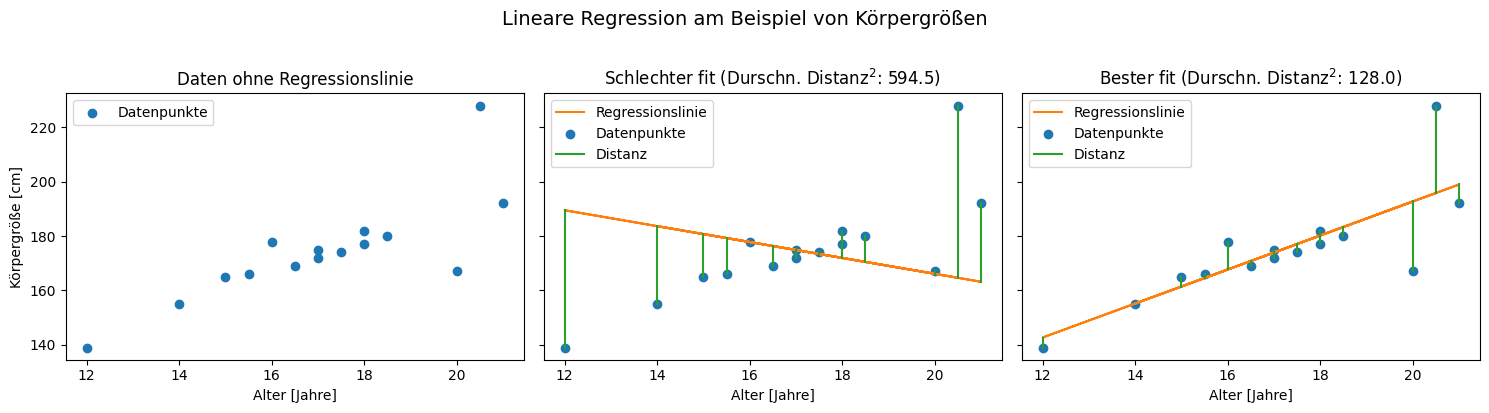



 <font color='sky blue'>__Aufgabe:__  <br>
Erstelle das lineare Regressionsmodell für unsere Daten!

Tipp: Wie immer findest du ein entsprechendes Beispiel auf deinem Cheat Sheet.
</font>

In [ ]:
# Dein Code hier...


# 1)  Vorbereitungen


# 2) Definieren des Modells


# 3) Erstellen des Modells


# 4) Berechne Vorhersagewerte anhand des Models





 <font color='sky blue'>__Aufgabe:__  <br>

*   Füge die "beste Gerade", d.h. die "vorhergesagten Werte" in
deine Grafik
      von vorhin hinzu. Hier kannst du auch wieder nach Belieben die Linienart
      und -farbe anpassen.
*   Sage die globale Durchschnittstemperatur (laut unserem Modell) für die
      Jahre 2030 und 2050 vorher.

*   Das 2-Grad-Ziel bezieht sich auf einen Temperaturanstieg im Vergleich
      zum vorindustriellen Zeitalter (bis ca. 1850). In welchem Jahr wird das
      2-Grad-Ziel nach unserem Modell überschritten?
      Tipp: Berechne zuerst die "Vorhersage" unseres Modells für 1850 (wie eben).
      Somit kannst du ganz einfach sehen, welcher Wert nicht überschritten werden darf.


</font>


In [ ]:
# Dein Code für die Grafik

In [ ]:
# Dein Code für die Vorhersagen

Bei diesem Ergebnis kann man sich natürlich einige Fragen stellen:
- Ist es realistisch, dass die 2 Grad in diesem Jahr erreicht werden?
- Welche Annahmen haben wir gemacht um dieses Jahr zu berechnen, und warum könnten diese falsch sein?
- Wie könnten wir unser Modell verbessern?

**Korrelationen**

Der Anstieg von Temperaturen ist nur eine Folge des Klimawandels. Wir wollen jetzt statistische Zusammenhänge zwischen verschiedenen Größen untersuchen. Hier kommt die Korrelation ins Spiel!

Die Korrelation zwischen zwei Größen ist eine Zahl zwischen -1 und 1 und gibt an, wie stark ihr linearer Zusammenhang ist. Je näher die Zahl bei 1 liegt, desto stärker ist der Zusammenhang. Anschaulich bedeutet das, dass man wie in vorangegangenen Beispiel eine "gute" Gerade durch die Datenpunkte zeichnen kann.

Korrelation darf allerdings nicht mit Kausalität (Ursache-Wirkungs-Beziehung) verwechselt werden! Eine starke Korrelation kann zwar darauf hindeuten, dass ein kausaler Zusammenhang besteht, ob und in welche Richtung geht allerdings nicht daraus hervor. Ein kleines Beispiel: Statistische Daten über Jahrzehnte hinweg zeigen eine eindeutige positive Korrelation zwischen der Storchenpopulation und der menschlichen Geburtenrate. Trotzdem gibt es keinen offensichtlichen kausalen Zusammenhang.


Wir benutzen nun einen neuen Datensatz. In diesem sind für die Jahre 1900 bis 2013 die Durchschnittstemperaturen an Land, die jährlichen CO2-Emissionen, der Meeresspeiegelanstieg, die Anzahl von Naturkatastrophen sowie die Weltbevölkerung zusammengetragen.

In [ ]:
# Lade den neuen Datensatz herunter
file = 'klimadaten.csv'
filelink = 'https://drive.google.com/uc?id=17_uNRMgcDjPPLyXeCXpOHHD7-UBLXQXf'
# Lese die Daten ein
gdown.download(filelink, file)
klimadaten = pd.read_csv(file)
klimadaten.rename( columns={'Unnamed: 0':'Jahre'}, inplace=True )
klimadaten

<font color='sky blue'>__Aufgabe:__  <br>
Bestimme die Korrelationen zwischen den Spalten des neuen Datensatzes! Zwischen welchen Größen sind die Zusammenhänge besonders stark und zwischen welchen nicht so sehr vorhanden? Woran kann das liegen?

Tipp: Auf deinem Cheat Sheet findest du wieder ein Beispiel mit dem entsprechenden Befehl!
</font>

In [ ]:
# dein Code hier

Das Handwerkszeug zur Analyse von Datensätzen haben wir gelernt!
Jetzt kannst du gerne den neuen Datensatz etwas mehr unter die Lupe nehmen und beispielsweise wieder Plots erstellen.

In [ ]:
# hier ist Platz für deinen Code

# Ausblick 🌤 🌍
Bisher haben wir die Temperaturen nur mit Liniendiagrammen visualisiert. Hier wollen wir euch noch eine andere coole Art der Visualisierung unserer Ergebnisse zeigen, nämlich einen interaktiven Globus! Diesen könnt ihr selbst mit eurer Maus drehen und dabei für jedes beliebige Land die durchschnittliche Temperatur sehen!

In [ ]:
# Für diese Visualisierung brauchen wir das Paket plotly
import plotly.express as px

# Hierfür brauchen wir wieder einen neuen Datensatz, der Temperaturen pro Land enthält
gdown.download("https://drive.google.com/uc?id=1A5ptCQlqJz4sQ2Y6WW2BchGMsrUKuHtW", "GlobalLandTemperaturesByCountry.csv")
GlobalLandTemperaturesByCountry = pd.read_csv("GlobalLandTemperaturesByCountry.csv")
Länder_Durchschnittstemperaturen = GlobalLandTemperaturesByCountry.groupby(by='Country', as_index=False).mean()


In [ ]:
fig = px.choropleth(
        # Als ersten Funktionsparameter übergeben wir unsere Tabellenwerte von oben
        Länder_Durchschnittstemperaturen,

        # Danach müssen wir erklären wie genau unsere Tabellenspalten aufgebaut sind

        # Hier müssen wir den Namen unserer Tabellenspalte eintragen, in der die Ländernamen stehen
        locations = 'Country',
        # Hier legen wir fest, dass in dieser Zeile ganz ausgeschriebene Ländernamen stehen. Eine andere Option wären Abkürzungen wie USA
        locationmode = 'country names',
        # Die Farbe soll unsere berechnete Spalte "AverageTemperature" mit den Durchschnittstemperaturen darstellen
        color = 'AverageTemperature',
        # Die Projection lässt unseren "Blickwinkel" auf die Erde einstellen: orthographic erstellt einen runden Globus, ihr könnt aber auch mal 'natural earth' versuchen
        projection = 'orthographic', # 'natural earth'

        # Zuletzt wählen wir den Text der als Legende / Label für unsere Tabellenspalten angezeigt werden soll: Durchschnittstemperatur und Land
        labels = {
            'AverageTemperature': 'Durchschnittstemperatur in °C',
            'Country': 'Land'},
            # die Farbskala wollen wir von einem dunklem blau Ton (283747) bis zu einem dunklem rot Ton (A93226)
            color_continuous_scale=('#283747', '#2874A6', '#3498DB', '#F5B041', '#E67E22', '#A93226'),
        )

# Nachdem die Bibliothek nun alle Details kennt, können wir die Visualisierung anzeigen lassen und erkunden
fig.show()

# Zusammenfassung

Was haben wir heute gelernt?

*   Maximale, minimale und Durchschnittswerte von Daten bestimmen

*   Daten grafisch darstellen

*   mit einem Modell Daten für die Zukunft vorhersagen

*   Korrelationen bzw. Zusammenhänge zwischen Größen aufzeigen





# Hintergrund ⏮🖱

Vielleicht hast du dich gefragt, was hinter Befehlen wie `min`, `max` oder `mean` steckt. Ganz einfach: Jemand hat ein Programm dafür geschrieben. Wenn wir Pakete wie `pandas` oder `numpy` importieren, dann können wir diese Programme einfach nutzen. Wie sie eigentlich funktionieren, schauen wir uns jetzt an.

Schau dir einmal das folgende Programm an, welches das Minimum einer Liste von Zahlen ausgibt. Was passiert in dem Programm?

In [ ]:
liste = [3,6,2,7,8,5]

minimum_temporär = liste[0]
for eintrag in liste:
  if eintrag < minimum_temporär:
    minimum_temporär = eintrag
minimum = minimum_temporär

print(minimum)

Etwas übersichtlicher können wir das Programm als Funktion schreiben:

In [ ]:
def minimum(liste):

  minimum_temporär = liste[0]
  for eintrag in liste:
    if eintrag < minimum_temporär:
      minimum_temporär = eintrag
  minimum = minimum_temporär

  return(minimum)

Wir können die Funktion nun für verschiedene Listen aufrufen.

In [ ]:
liste1 = [300, 5, 30, -80, 204, 47]
minimum(liste1)

In [ ]:
liste2 = [0.5, 0.2, 0.6, 0.7]
minimum(liste2)


<font color='sky blue'>__Aufgabe:__  <br>
Versuche eine ähnliche Funktion zu schreiben, die
das Maximum einer Liste ausgibt!
</font>

In [ ]:
def maximum(liste):

  # hier kommt dein Code hin

  return maximum

Jetzt noch der Durchschnitt! Das ist vielleicht erstmal nicht so einfach. Zur Hilfe zeigt das folgende Beispiel, wie die Summe aller Zahlen in einer Liste berechnet werden kann.

In [ ]:
def summe(liste):

  summe_temporär = 0
  for eintrag in liste:
    summe_temporär = summe_temporär + eintrag
  summe = summe_temporär

  return summe

Und jetzt du!

<font color='sky blue'>__Aufgabe:__  <br>
Schreibe eine Funktion, die
den Durchschnitt einer Liste berechnet!

Tipp: Die Länge der Liste (= Anzahl der Einträge) wird durch den Befehl `len(liste)` ausgegeben.
</font>

In [ ]:
def durchschnitt(liste):

  # hier kommt dein Code hin

  return durchschnitt